In [1]:
from dqn_agent import DQN
import numpy as np
import os
import gym
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')    
    best_score = -np.inf

    if not os.path.exists('model'): 
        os.mkdir('model')
    
    if not os.path.exists('best_model'): 
        os.mkdir('best_model')

    kwargs = {
        "gamma": 0.99, 
        "epsilon": 1.0, 
        "lr": 0.001, 
        "n_actions": env.action_space.n, 
        "input_dims": (env.observation_space.shape), 
        "mem_size": 50000, 
        "batch_size": 32, 
        "eps_min": 0.01, 
        "eps_dec": 1e-5, 
        "replace": 100
    }
    
    agent = DQN(**kwargs)
    n_games = 3000

    scores, eps_history = [], []
    save_interval = 500
    best_interval = 2000

    for i in range(n_games):
        done = False
        observation = env.reset()

        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward, observation_, done)
            agent.learn()

            observation = observation_
        
        scores.append(score)

        avg_score = np.mean(scores[-100:])
        clear_output(wait=True)

        if score > best_score:
            best_score = score

        eps_history.append(agent.epsilon)

        '''save model'''
        if i % save_interval ==0:
            agent.save(i)
            
        ''' best model '''
        if i >= best_interval:
            if scores[-1] > scores[-2]:
                agent.best_save()

        print(f"episode: {i}, score: {score:.1f}, avg score {avg_score:.1f}, best score: {best_score:.1f}, epsilon: {agent.epsilon:.2f}")


episode: 2999, score: 200.0, avg score 182.8, best score: 200.0, epsilon: 0.01


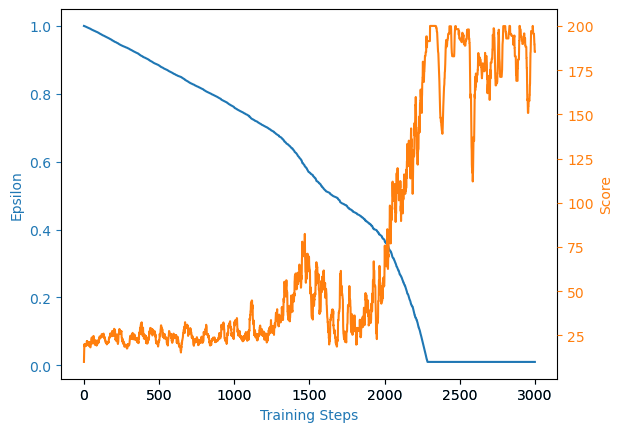

In [4]:
    x = [i+1 for i in range(n_games)]
    
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, eps_history, color="C0")
    ax.set_xlabel("Training Steps", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
	    running_avg[t] = np.mean(scores[max(0, t-20):(t+1)])

    ax2.plot(x, running_avg, color="C1")
    ax2.axes.get_xaxis()
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Score', color="C1")
    ax2.yaxis.set_label_position('right')
    ax2.tick_params(axis='y', colors="C1")
